In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cab_data = pd.read_csv("C:/Users/DELL/CabData/DataSets/Cab_Data.csv", sep=',' ) 
city = pd.read_csv("C:/Users/DELL/CabData/DataSets/City.csv", sep=',' ) 
customer = pd.read_csv("C:/Users/DELL/CabData/DataSets/Customer_ID.csv", sep=',' ) 
transaction = pd.read_csv("C:/Users/DELL/CabData/DataSets/Transaction_ID.csv", sep=',' ) 
holidays = pd.read_csv("C:/Users/DELL/CabData/DataSets/US Holiday Dates (2004-2021).csv", sep=',' ) 


In [4]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
cab_data.shape

(359392, 7)

In [6]:
city.shape

(20, 3)

In [7]:
customer.shape

(49171, 4)

In [8]:
transaction.shape

(440098, 3)

In [9]:
holidays.shape

(342, 6)

In [10]:
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"],unit='D', origin='1899-12-30')

In [11]:
result = pd.merge(cab_data, transaction, on="Transaction ID",how="inner")

In [12]:
result = result[result["Date of Travel"]>='2016-01-31']

In [13]:
print(result["Date of Travel"].min())
print(result["Date of Travel"].max())

2016-01-31 00:00:00
2018-12-31 00:00:00


In [14]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
result_2= pd.merge(result, customer, on="Customer ID",how="inner")

In [16]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [48]:
df = pd.merge(result_2, city, on="City",how="inner")

In [49]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10004263,2016-02-02,Pink Cab,ATLANTA GA,25.07,355.29,285.7980,29170,Cash,Male,40,11777,"814,885","24,701"
1,10049443,2016-07-04,Pink Cab,ATLANTA GA,19.72,203.13,228.7520,29170,Cash,Male,40,11777,"814,885","24,701"
2,10197301,2017-07-21,Yellow Cab,ATLANTA GA,3.60,90.89,48.8160,29170,Card,Male,40,11777,"814,885","24,701"
3,10391854,2018-10-20,Pink Cab,ATLANTA GA,36.63,495.41,435.8970,29170,Cash,Male,40,11777,"814,885","24,701"
4,10004551,2016-01-31,Yellow Cab,ATLANTA GA,17.34,336.95,224.7264,29107,Card,Female,30,19129,"814,885","24,701"


In [50]:
df.shape

(355032, 14)

In [51]:
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [52]:
df.columns.values[4:6]

array(['KM Travelled', 'Price Charged'], dtype=object)

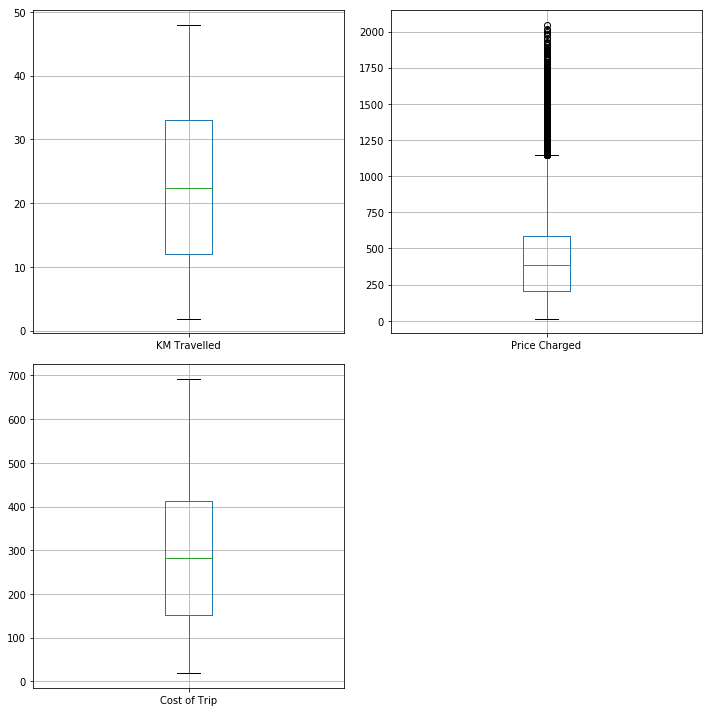

In [53]:
fig, axes = plt.subplots(2,2,figsize=(10,10)) # create figure and axes


for i,el in enumerate(list(df.columns.values)[4:7]):
    a = df.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout() 

plt.show()

In [54]:
q = df["Price Charged"].quantile(0.99)
df=df[df["Price Charged"] < q]

In [55]:
df.shape

(351481, 14)

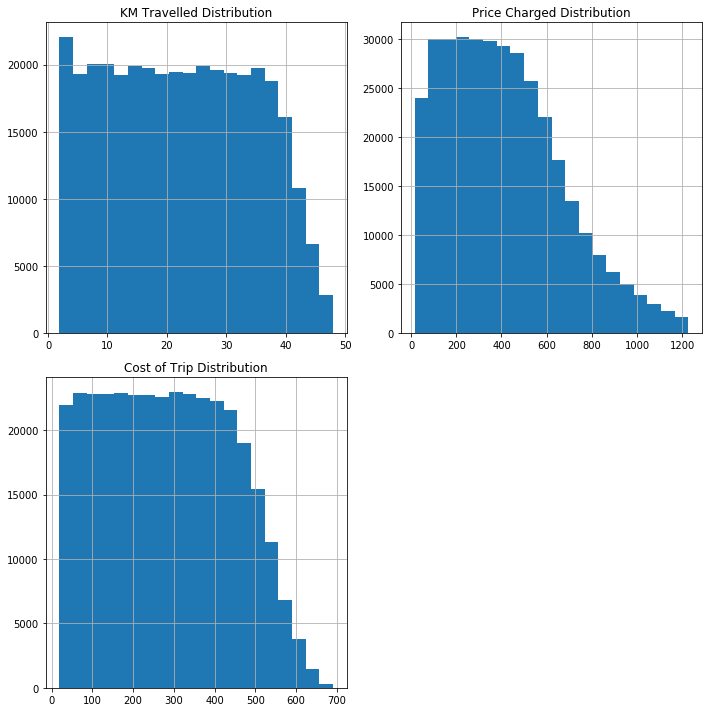

In [56]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(10,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  
  
    plt.show()

draw_histograms(df, df.columns[4:7], 2, 2)



In [57]:
df["Profit"]=df["Price Charged"]-df["Cost of Trip"]
df["Month"]=df["Date of Travel"].dt.month

In [58]:
df_1 = df.groupby(['Company'])['Profit'].sum()

In [59]:
df_1=pd.DataFrame(df_1).reset_index()

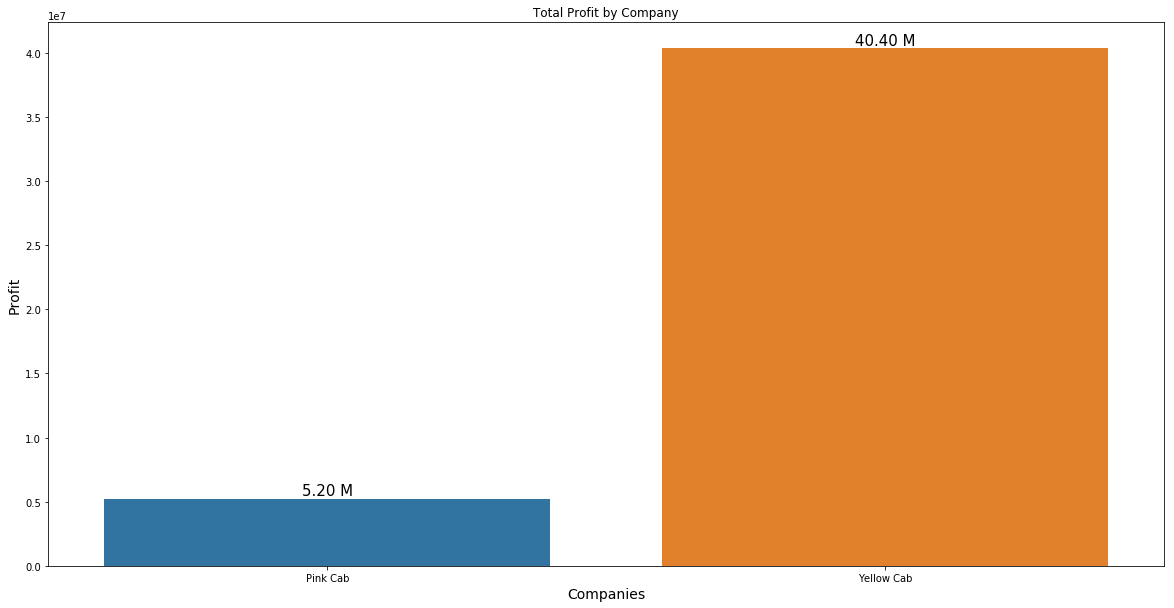

In [60]:
plt.figure(figsize=(20,10)) 
plots = sns.barplot(x="Company", y="Profit", data=df_1)

for bar in plots.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(round(bar.get_height()/1e6, 1), '.2f')+" M",  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 


# Setting the label for x-axis 
plt.xlabel("Companies", size=14) 
  
# Setting the label for y-axis 
plt.ylabel("Profit", size=14) 
  
# Setting the title for the graph 
plt.title("Total Profit by Company") 
  
# Fianlly showing the plot 
plt.show() 


In [61]:
df_2 = df.groupby(['Company',"Month"])['Profit'].sum()

In [62]:
df_2=pd.DataFrame(df_2).reset_index()

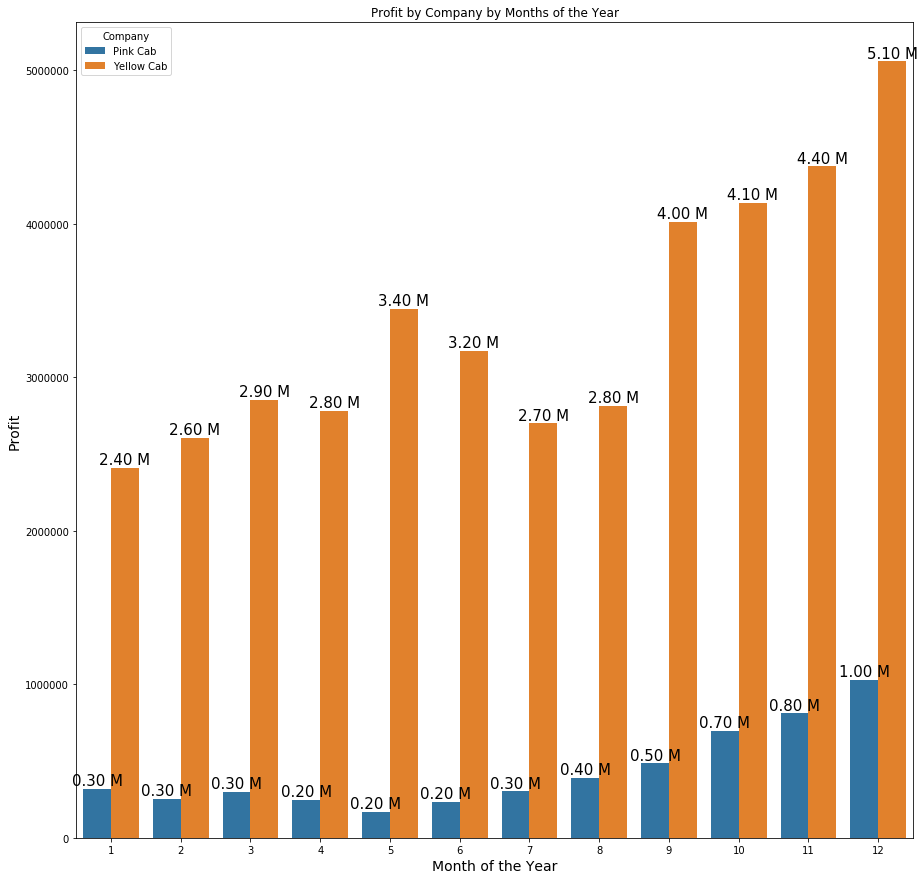

In [63]:
plt.figure(figsize = (15,15))

plots = sns.barplot(x="Month", y="Profit", hue="Company", data=df_2)
for bar in plots.patches: 
    
    plots.annotate(format(round(bar.get_height()/1e6, 1), '.2f')+" M",  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
# Setting the label for x-axis 
plt.xlabel("Month of the Year", size=14) 
  
# Setting the label for y-axis 
plt.ylabel("Profit", size=14) 
  
# Setting the title for the graph 
plt.title("Profit by Company by Months of the Year") 
  
# Fianlly showing the plot 
plt.show() 


In [64]:
df_3 = df.groupby(['Company',df["Date of Travel"].dt.year])['Profit'].sum()
df_3=pd.DataFrame(df_3).reset_index()

In [65]:
df_3

,Company,Date of Travel,Profit
0,Pink Cab,2016,1.638945e+06
1,Pink Cab,2017,2.029720e+06
2,Pink Cab,2018,1.558541e+06
3,Yellow Cab,2016,1.213644e+07
4,Yellow Cab,2017,1.524197e+07
5,Yellow Cab,2018,1.298805e+07


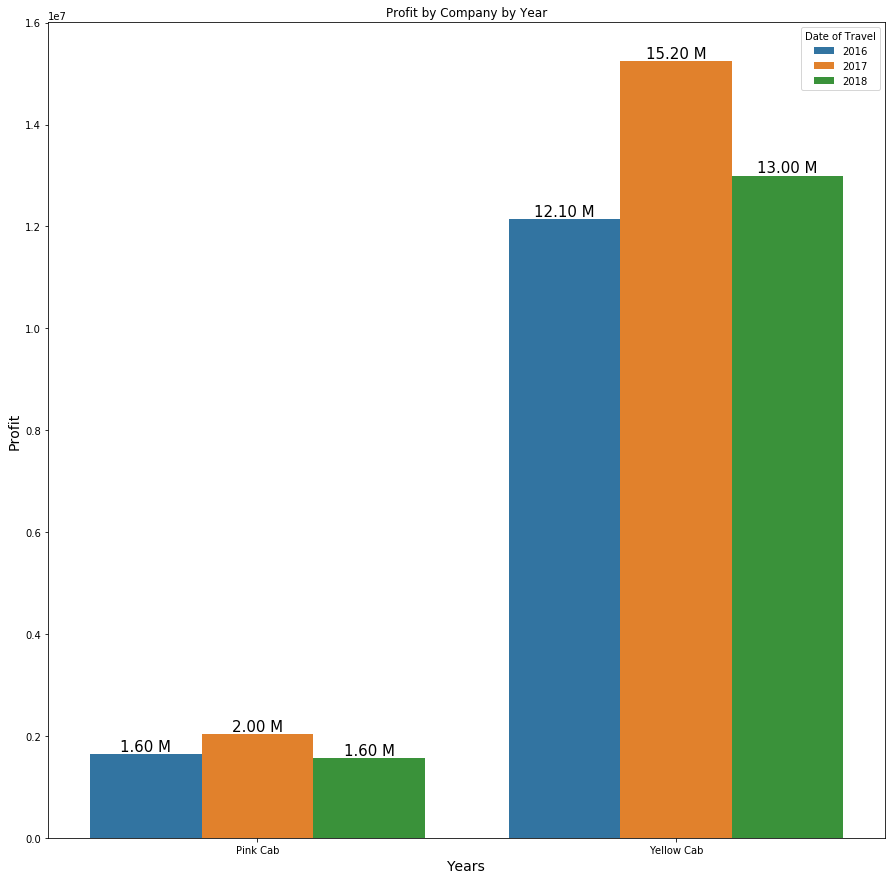

In [66]:
plt.figure(figsize = (15,15))

plots = sns.barplot(x="Company", y="Profit", hue="Date of Travel", data=df_3)
for bar in plots.patches: 

    plots.annotate(format(round(bar.get_height()/1e6, 1), '.2f')+" M",  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
# Setting the label for x-axis 
plt.xlabel("Years", size=14) 
  
# Setting the label for y-axis 
plt.ylabel("Profit", size=14) 
  
# Setting the title for the graph 
plt.title("Profit by Company by Year") 
  
# Fianlly showing the plot 
plt.show() 


In [67]:
df_4 = df.groupby(['Company','City'])['Transaction ID'].count()
df_4=pd.DataFrame(df_4)
df_4["Profit"]=df.groupby(['Company','City'])['Profit'].sum()
df_4=df_4.reset_index()
df_pink=df_4[df_4["Company"]=="Pink Cab"]
df_yellow=df_4[df_4["Company"]=="Yellow Cab"]

In [68]:
df_yellow["Profit_percent"]=df_yellow["Profit"]/sum(df_yellow["Profit"])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df_pink["Profit_percent"]=df_pink["Profit"]/sum(df_pink["Profit"])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
per_city_comp_profit=df_pink.append(df_yellow)
per_city_comp_profit

,Company,City,Transaction ID,Profit,Profit_percent
0,Pink Cab,ATLANTA GA,1741,9.478896e+04,0.018134
1,Pink Cab,AUSTIN TX,1861,1.470359e+05,0.028129
2,Pink Cab,BOSTON MA,5115,2.594182e+05,0.049628
3,Pink Cab,CHICAGO IL,9248,3.116479e+05,0.059620
4,Pink Cab,DALLAS TX,1356,2.505804e+04,0.004794
5,Pink Cab,DENVER CO,1381,4.070633e+04,0.007787
6,Pink Cab,LOS ANGELES CA,19668,1.100678e+06,0.210567
7,Pink Cab,MIAMI FL,1980,1.512289e+05,0.028931
8,Pink Cab,NASHVILLE TN,1829,6.330157e+04,0.012110
9,Pink Cab,NEW YORK NY,13870,1.502739e+06,0.287484


In [71]:
pink_profit=[]
yellow_profit=[]
for i in range(len(df_pink)):
    for j in range(len(df_yellow)):
        if df_pink.iloc[i]["City"]==df_yellow.iloc[j]["City"]:
            pink_profit.append(df_pink.iloc[i]["Profit"]/(df_pink.iloc[i]["Profit"]+df_yellow.iloc[j]["Profit"]))
            yellow_profit.append(df_yellow.iloc[i]["Profit"]/(df_pink.iloc[i]["Profit"]+df_yellow.iloc[j]["Profit"]))
        

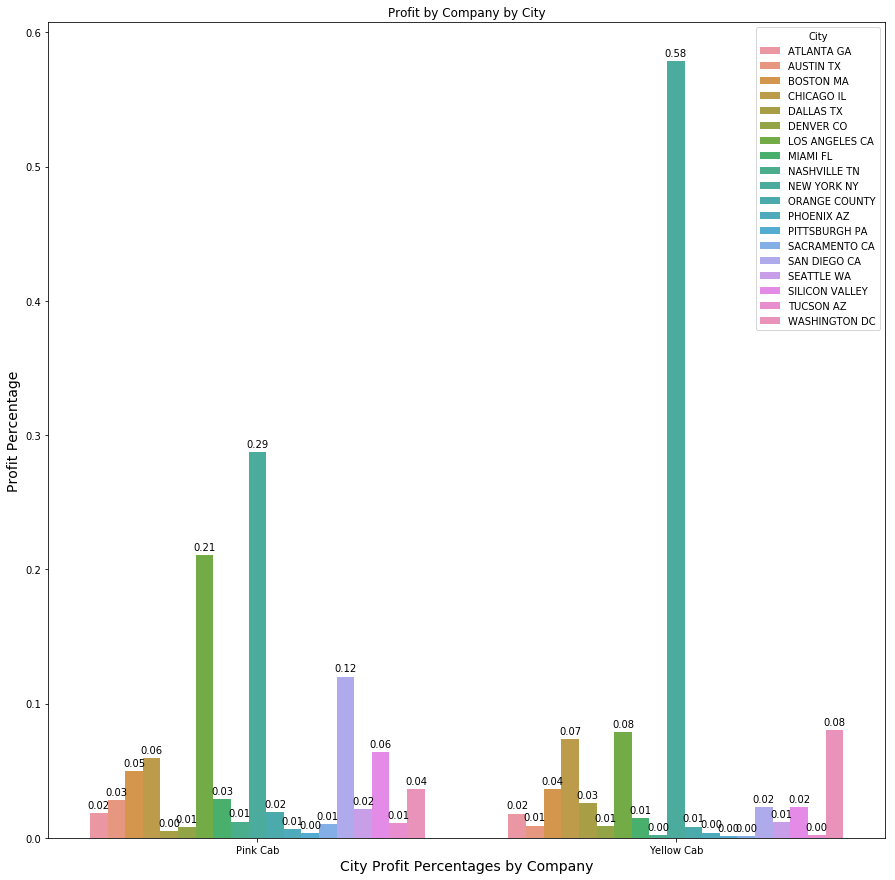

In [72]:
plt.figure(figsize = (15,15))

plots = sns.barplot(x="Company", y="Profit_percent", hue="City", data=per_city_comp_profit)
for bar in plots.patches: 

    plots.annotate(format(bar.get_height(), '.2f'),    
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points') 
    
# Setting the label for x-axis 
plt.xlabel("City Profit Percentages by Company", size=14) 

  
# Setting the label for y-axis 
plt.ylabel("Profit Percentage", size=14) 

# Setting the title for the graph 
plt.title("Profit by Company by City") 
  
# Fianlly showing the plot 
plt.show() 


In [73]:


def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels,size=15,rotation=90)

    if y_label:
        plt.ylabel(y_label,size=15)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='top', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points')

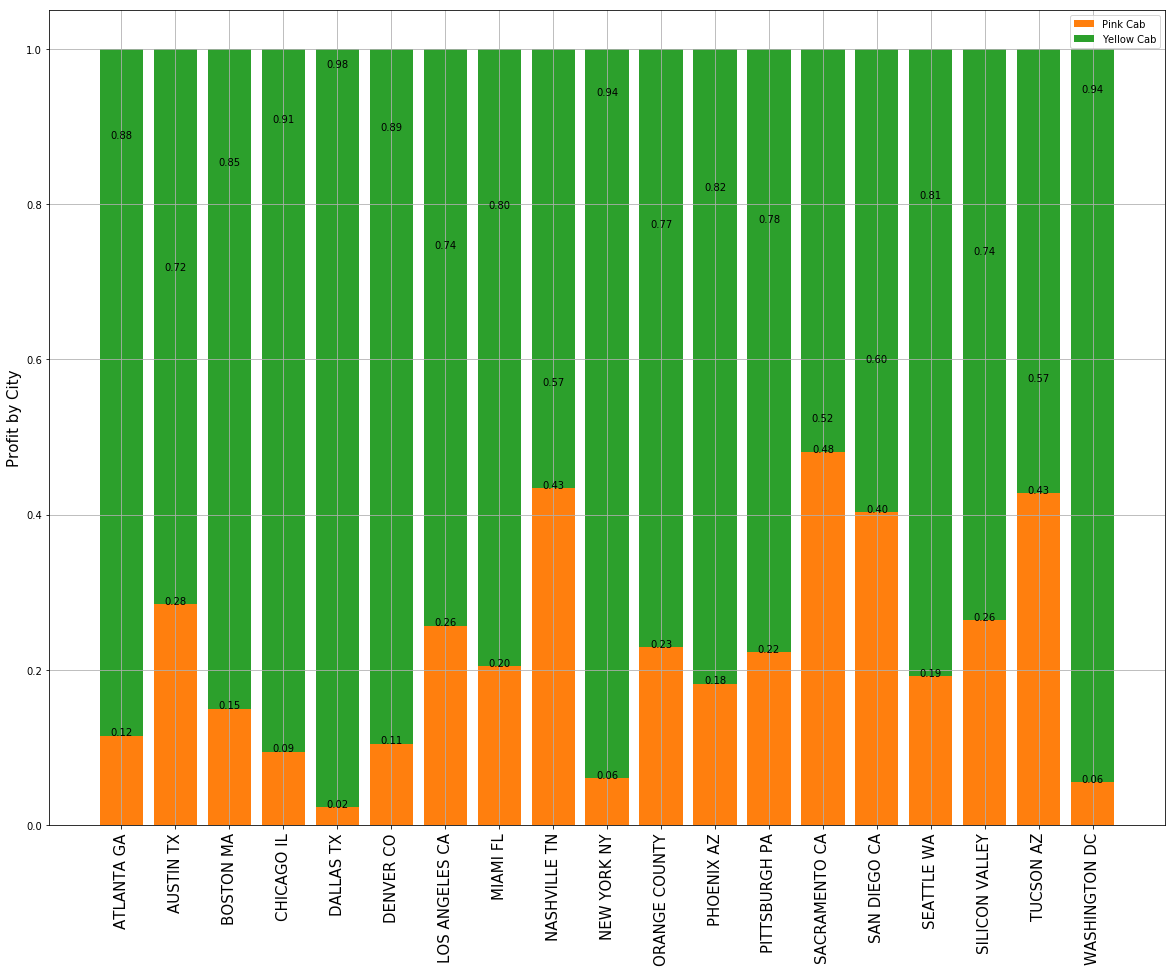

In [74]:
plt.figure(figsize=(20, 15))
series_labels = ['Pink Cab', 'Yellow Cab']

data = [
    pink_profit,
    yellow_profit
]

category_labels = df_pink["City"].to_list()

plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    colors=['tab:orange', 'tab:green'],
    y_label="Profit by City"
)


plt.show()

In [75]:
#!pip install seaborn==0.9.0

In [76]:
df_7 = df.groupby(['Company','City'])['Transaction ID'].count()

In [77]:
df_7=pd.DataFrame(df_7).reset_index()
df_pinku=df_7[df_7["Company"]=="Pink Cab"]
df_yellowu=df_7[df_7["Company"]=="Yellow Cab"]

In [78]:
pink_user=[]
yellow_user=[]
for i in range(len(df_pinku)):
    for j in range(len(df_yellowu)):
        if df_pinku.iloc[i]["City"]==df_yellowu.iloc[j]["City"]:
            pink_user.append(df_pinku.iloc[i]["Transaction ID"]/(df_pinku.iloc[i]["Transaction ID"]+df_yellowu.iloc[j]["Transaction ID"]))
            yellow_user.append(df_yellowu.iloc[i]["Transaction ID"]/(df_pinku.iloc[i]["Transaction ID"]+df_yellowu.iloc[j]["Transaction ID"]))

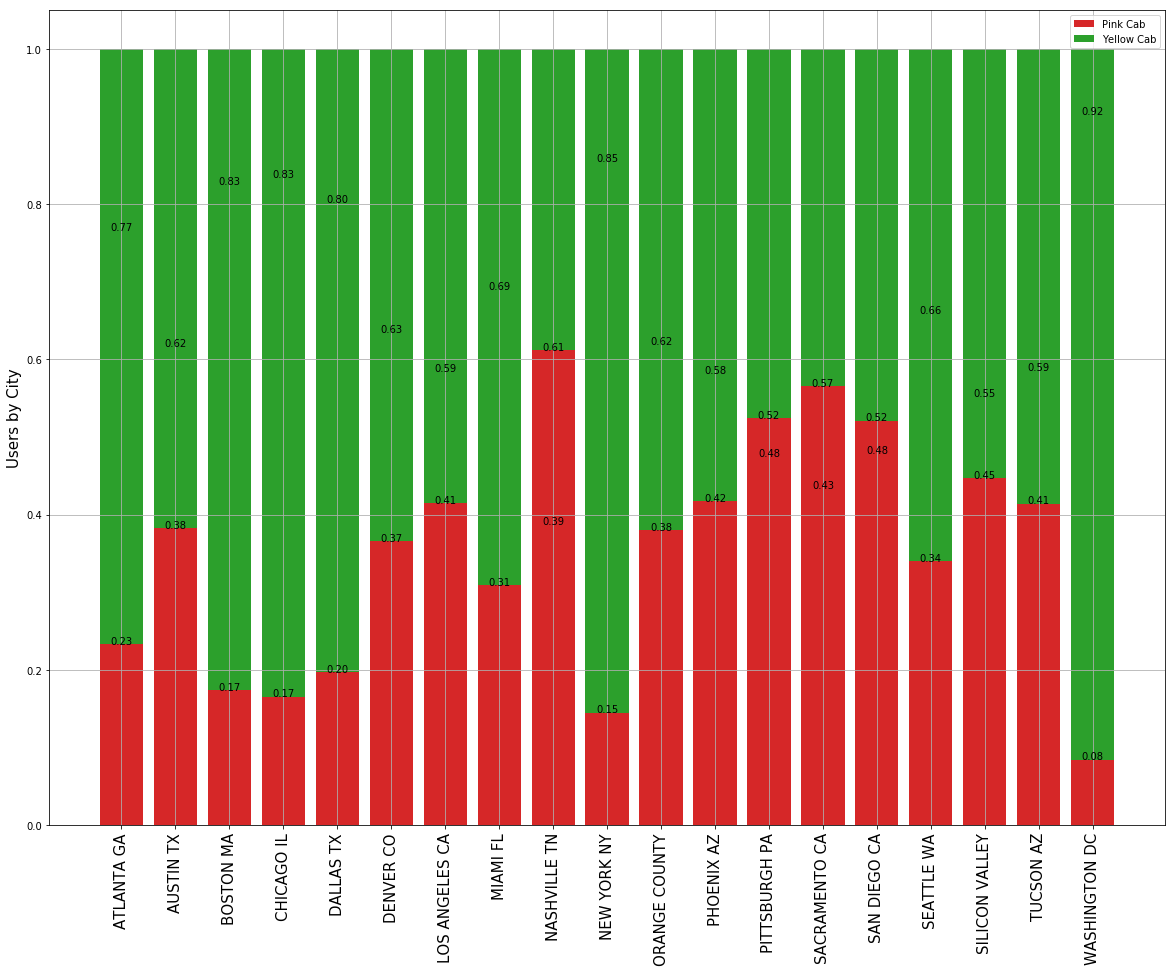

In [79]:
plt.figure(figsize=(20, 15))
series_labels = ['Pink Cab', 'Yellow Cab']

data = [
    pink_user,
    yellow_user
]

category_labels = df_pinku["City"].to_list()

plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    colors=['tab:red', 'tab:green'],
    y_label="Users by City"
)


plt.show()

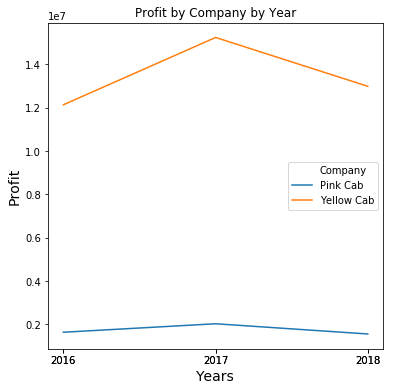

In [80]:
plt.figure(figsize = (6,6))

plots = sns.lineplot(x="Date of Travel", y="Profit", hue="Company",markers=True, data=df_3)

# Setting the label for x-axis 
plt.xlabel("Years", size=14) 
plt.xticks(df_3["Date of Travel"])

# Setting the label for y-axis 
plt.ylabel("Profit", size=14) 
  
# Setting the title for the graph 
plt.title("Profit by Company by Year") 
  
# Fianlly showing the plot 
plt.show() 

In [81]:
df_5 = df.groupby(['Company','Customer ID',df["Date of Travel"].dt.year])['Transaction ID'].count()

In [82]:
df_5=pd.DataFrame(df_5).reset_index()
df_5times=df_5[df_5["Transaction ID"]>5]

In [83]:
trips_by_year=df_5times.groupby(["Date of Travel","Company"])["Transaction ID"].sum()

In [84]:
trips_by_year=pd.DataFrame(trips_by_year).reset_index()

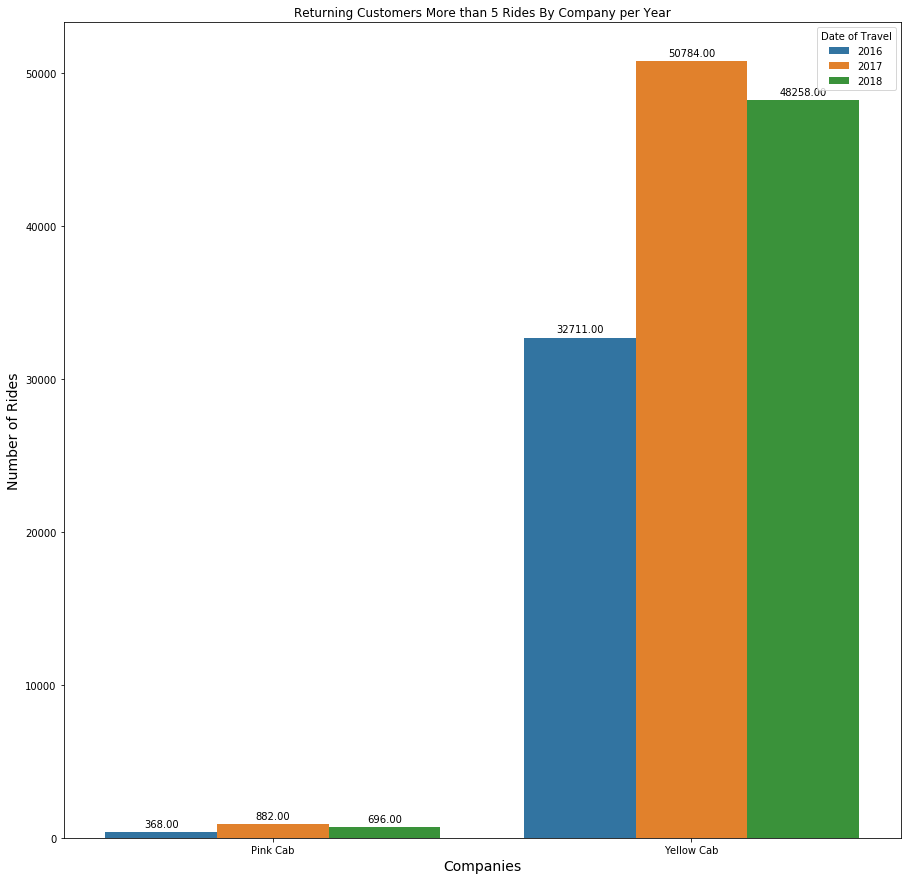

In [85]:
plt.figure(figsize = (15,15))

plots = sns.barplot(x="Company", y="Transaction ID", hue="Date of Travel", data=trips_by_year)
for bar in plots.patches: 

    plots.annotate(format(bar.get_height(), '.2f'),    
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points') 
    
# Setting the label for x-axis 
plt.xlabel("Companies", size=14) 

  
# Setting the label for y-axis 
plt.ylabel("Number of Rides", size=14) 

# Setting the title for the graph 
plt.title("Returning Customers More than 5 Rides By Company per Year") 
  
# Fianlly showing the plot 
plt.show() 


In [86]:
df_6 = df.groupby(['Company','Gender',df["Date of Travel"].dt.year])['Transaction ID'].count()
df_6=pd.DataFrame(df_6).reset_index()

In [87]:
df_6

,Company,Gender,Date of Travel,Transaction ID
0,Pink Cab,Female,2016,10830
1,Pink Cab,Female,2017,13475
2,Pink Cab,Female,2018,13132
3,Pink Cab,Male,2016,13359
4,Pink Cab,Male,2017,16842
5,Pink Cab,Male,2018,16176
6,Yellow Cab,Female,2016,32994
7,Yellow Cab,Female,2017,41126
8,Yellow Cab,Female,2018,40079
9,Yellow Cab,Male,2016,44525


In [88]:
df_6_pink= df_6[df_6["Company"]=="Pink Cab"]
df_6_yellow= df_6[df_6["Company"]=="Yellow Cab"]

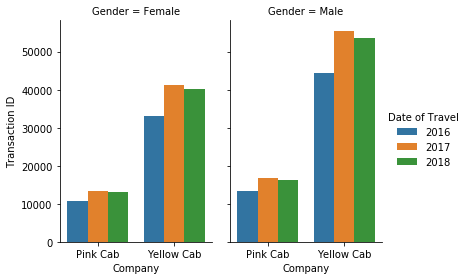

In [89]:

plt.figure(figsize=(20,20))     


# Plotting
sns.catplot(x="Company", y="Transaction ID",
                hue="Date of Travel", col="Gender",
                data=df_6, kind="bar",
                height=4, aspect=.7);




plt.show()

In [90]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Month
0,10004263,2016-02-02,Pink Cab,ATLANTA GA,25.07,355.29,285.7980,29170,Cash,Male,40,11777,"814,885","24,701",69.4920,2
1,10049443,2016-07-04,Pink Cab,ATLANTA GA,19.72,203.13,228.7520,29170,Cash,Male,40,11777,"814,885","24,701",-25.6220,7
2,10197301,2017-07-21,Yellow Cab,ATLANTA GA,3.60,90.89,48.8160,29170,Card,Male,40,11777,"814,885","24,701",42.0740,7
3,10391854,2018-10-20,Pink Cab,ATLANTA GA,36.63,495.41,435.8970,29170,Cash,Male,40,11777,"814,885","24,701",59.5130,10
4,10004551,2016-01-31,Yellow Cab,ATLANTA GA,17.34,336.95,224.7264,29107,Card,Female,30,19129,"814,885","24,701",112.2236,1


In [91]:
import scipy.cluster.hierarchy as sch
from sklearn import preprocessing

In [92]:
#df_unique=df[~df.duplicated(['Customer ID'])]

In [93]:
segment=df[["Gender","Age","Income (USD/Month)"]]
segment['Gender']=segment['Gender'].apply(lambda x: 1 if (x=='Female')  else 0)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
X_customers = preprocessing.StandardScaler().fit(segment).transform(segment)

## Kmeans Clustering

In [95]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D 

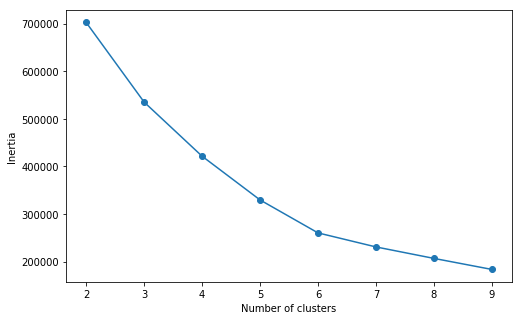

In [96]:

scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(X_customers)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,10), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [122]:
kmeans_labels=KMeans(n_clusters=6,random_state=123).fit_predict(X_customers)

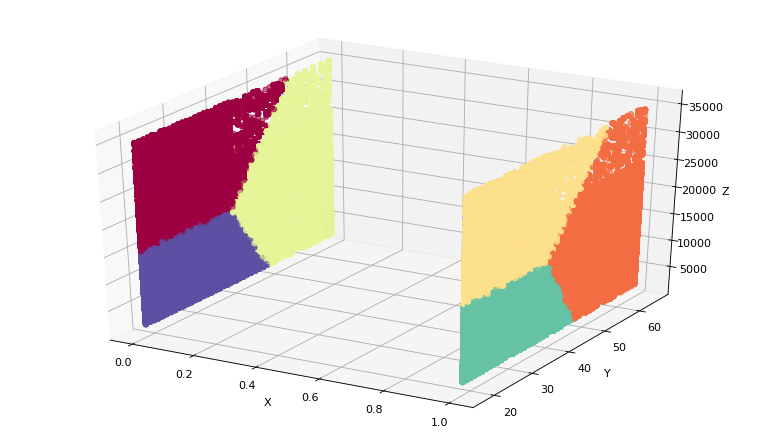

In [123]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter(segment["Gender"],segment["Age"],segment["Income (USD/Month)"],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

In [124]:
segment['Clusters']=list(kmeans_labels)
segment["Company"]=df["Company"]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
customers=pd.DataFrame(segment['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

,5,0,4,2,3,1
Number of Customers,82024,72280,62745,54274,45541,34617


In [126]:
segment.set_index('Clusters')
grouped=segment.groupby('Clusters').mean().round(1)

In [128]:
pink_count=[]
yellow_count=[]
for i in [0,1,2,3,4,5]:
    cl=segment[segment["Clusters"]==i]
    pink_count.append(len(cl[cl["Company"]=="Pink Cab"]))
    yellow_count.append(len(cl[cl["Company"]=="Yellow Cab"]))

In [129]:
grouped["Pink Cab Rides"]=pink_count
grouped["Yellow Cab Rides"]=yellow_count

In [130]:
segment["Profit"]=df["Profit"]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
cl=segment[segment["Clusters"]==2]
cl.iloc[8]["Company"]=="Pink Cab"

False

In [105]:
pink_profit_cluster=[]
yellow_profit_cluster=[]
for i in [0,1,2,3,4,5]:
    cl=segment[segment["Clusters"]==i]
    pp=0
    yp=0 
    for j in range(len(cl)):
        if cl.iloc[j]["Company"]=="Pink Cab":
            pp=pp+cl.iloc[j]["Profit"]
        elif cl.iloc[j]["Company"]=="Yellow Cab":
            yp=yp+cl.iloc[j]["Profit"]
    pink_profit_cluster.append(pp)
    yellow_profit_cluster.append(yp)



In [106]:
pink_profit_cluster

[1062934.7919999969,
 528553.9100000003,
 845297.4639999972,
 651131.4549999967,
 950006.1420000034,
 1189282.7800000024]

In [107]:
grouped["Pink Cab Profit"]=pink_profit_cluster
grouped["Yellow Cab Profit"]=yellow_profit_cluster

In [108]:
grouped=grouped.reset_index()

In [109]:
grouped

,Clusters,Gender,Age,Income (USD/Month),Pink Cab Profit,Yellow Cab Profit
0,0,0.0,29.9,22377.4,1062934.792,8.582093e+06
1,1,1.0,54.5,14739.7,528553.910,3.888695e+06
2,2,1.0,29.9,22604.0,845297.464,6.090465e+06
3,3,0.0,54.5,14953.3,651131.455,5.340966e+06
4,4,1.0,29.4,8702.5,950006.142,6.918432e+06
5,5,0.0,29.6,8623.3,1189282.780,9.545803e+06


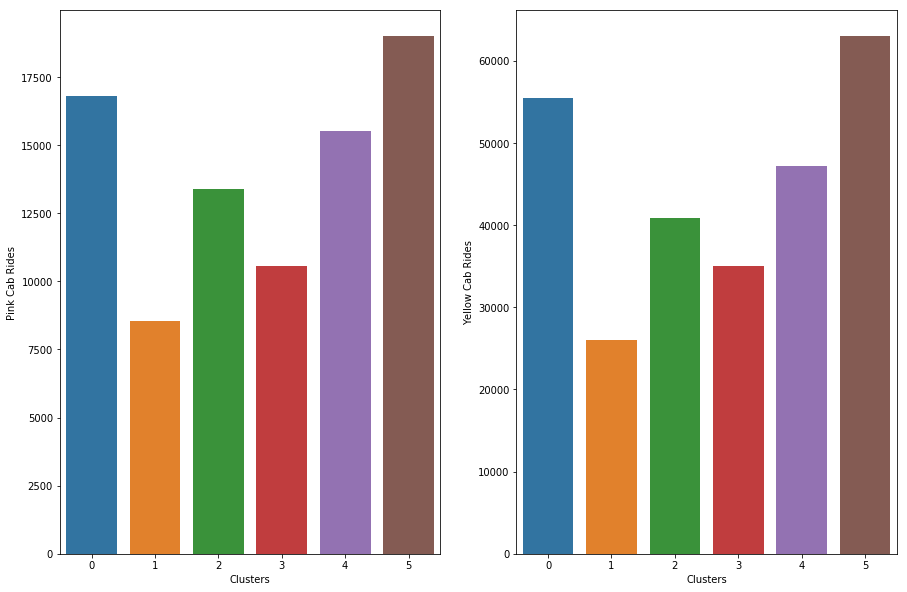

In [113]:
   
fig, axs = plt.subplots(1,2,figsize=(15,10)) 
for ax,col in zip(axs,["Pink Cab Rides", "Yellow Cab Rides"]):
    sns.barplot(x="Clusters", y=col, data=grouped, ax=ax)





plt.show()

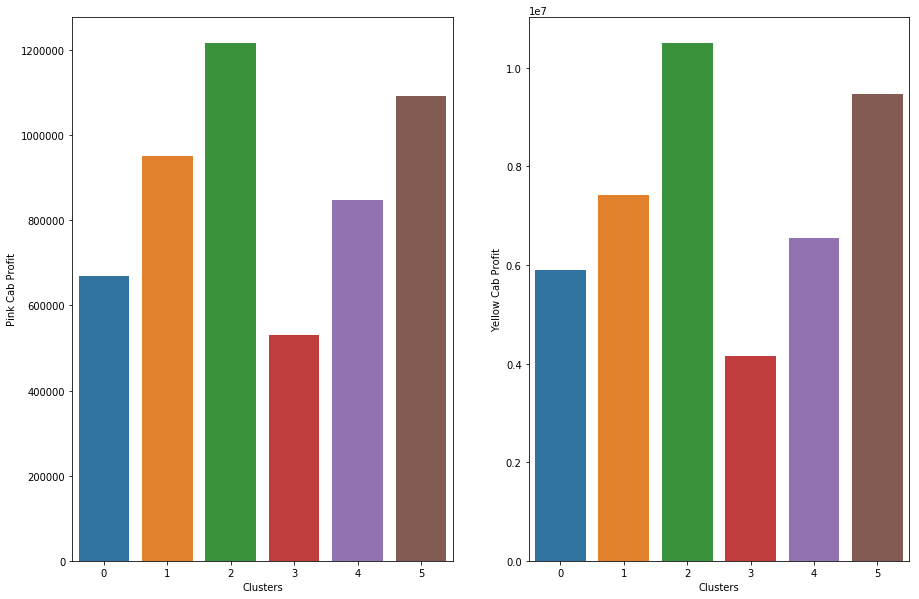

In [207]:
fig, axs = plt.subplots(1,2,figsize=(15,10)) 
for ax,col in zip(axs,["Pink Cab Profit", "Yellow Cab Profit"]):
    sns.barplot(x="Clusters", y=col, data=grouped, ax=ax)





plt.show()